In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
mnist.load_data?

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test=x_test.reshape(-1,784)
x_train=x_train.reshape(-1, 784)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(units=64, activation='relu',input_shape= (784, )))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 128, activation='relu'))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 71,626
Trainable params: 71,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'] ) #Adam optimiser optimise the loss function....kind of Gradient Descent


In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
from keras.utils import to_categorical


In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train=to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
y_test=to_categorical(y_test)
y_test.shape

(10000, 10)

In [ ]:
hist=model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8803 - accuracy: 0.8268 - val_loss: 0.3275 - val_accuracy: 0.9077
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2615 - accuracy: 0.9238 - val_loss: 0.2284 - val_accuracy: 0.9383
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2054 - accuracy: 0.9406 - val_loss: 0.1965 - val_accuracy: 0.9447
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1703 - accuracy: 0.9504 - val_loss: 0.1894 - val_accuracy: 0.9503
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1489 - accuracy: 0.9569 - val_loss: 0.2132 - val_accuracy: 0.9452
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1319 - accuracy: 0.9620 - val_loss: 0.1746 - val_accuracy: 0.9558
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1182 - accuracy: 0.9655 - val_loss: 0.1546 - val_accuracy:

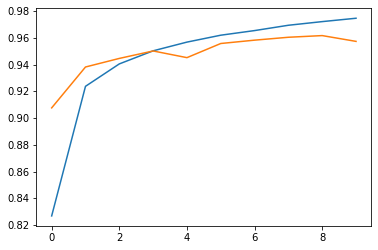

In [ ]:
history=hist.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

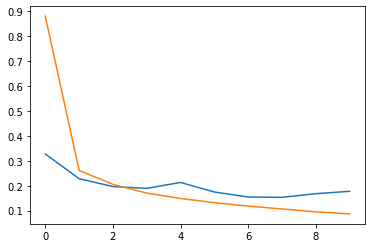

In [ ]:
history=hist.history
plt.plot(history['val_loss'])
plt.plot(history['loss'])

In [ ]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1030 - accuracy: 0.9718


[0.10299202799797058, 0.9717833399772644]

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.9602


[0.15700292587280273, 0.9602000117301941]

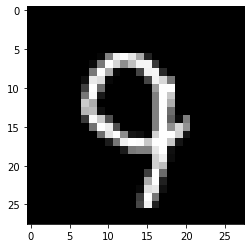

In [ ]:
plt.imshow(x_test[999].reshape(28,28), cmap='gray')

In [ ]:
model.predict(x_test[999].reshape(-1,784))

array([[1.1182902e-06, 2.0445267e-11, 1.1085021e-05, 7.3818351e-06,
        2.8031252e-04, 4.1466713e-08, 1.2806809e-13, 2.6074271e-03,
        2.7990350e-06, 9.9708980e-01]], dtype=float32)

In [ ]:
model.predict_classes(x_test[999].reshape(-1,784))

array([9])